In [3]:
!pip install pandas
!pip install xlrd
!pip install sklearn
!pip install imblearn

In [1]:
import xlrd
book = xlrd.open_workbook("Datasheets info.xlsx")
sheetMQ2 = book.sheet_by_name("MQ2 - Pololulu")
sheetMQ3 = book.sheet_by_name("MQ3 - Sparkfun")
sheetMQ4 = book.sheet_by_name("MQ4 - Sparkfun")
sheetMQ5 = book.sheet_by_name("MQ5 - Sparkfun")
sheetMQ6 = book.sheet_by_name("MQ6 - Sparkfun")
sheetMQ7 = book.sheet_by_name("MQ7 - Sparkfun")
sheetMQ8 = book.sheet_by_name("MQ8 - Sparkfun")
sheetMQ9 = book.sheet_by_name("MQ9 - Haoyuelectronics")
sheetMQ131 = book.sheet_by_name("MQ131- Sensorsportal")
sheetMQ135 = book.sheet_by_name("MQ135 - HANWEI")
sheetMQ303A = book.sheet_by_name("MQ303A - HANWEI")
sheetMQ309A = book.sheet_by_name("MQ309A - HANWEI")

In [4]:
for row_index in range(1,20): #reading first columns
    RsR0, Iso_butano, Hidrogeno , Alcohol = sheetMQ303A.row_values(row_index, start_colx=0, end_colx=4)
    print(RsR0, "	", Iso_butano, "	", Hidrogeno, "	", Alcohol)
 

0.01 	  	  	 
0.02 	  	  	 
0.03 	  	  	 
0.04 	  	  	 
0.05 	  	  	 
0.06 	  	  	 
0.07 	  	  	 
0.08 	  	  	 
0.09 	  	  	 
0.1 	 3000.0 	  	 1000.0
0.2 	  	 300.0 	 
0.3 	 300.0 	 100.0 	 
0.4 	 100.0 	  	 30.0
0.5 	  	  	 
0.6 	  	  	 10.0
0.7 	  	  	 
0.8 	  	 10.0 	 
0.9 	  	  	 
1.0 	  	  	 


In [5]:
x_MQ303A = sheetMQ303A.col_values(0)[2:]
MQ303A_Iso_butano = sheetMQ303A.col_values(1)[2:]
MQ303A_Hidrogeno = sheetMQ303A.col_values(2)[2:]
MQ303A_Alcohol = sheetMQ303A.col_values(3)[2:]

In [7]:
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

In [8]:
MQ303A_Iso_butano =zero_to_nan(MQ303A_Iso_butano)
MQ303A_Hidrogeno =zero_to_nan(MQ303A_Hidrogeno)
MQ303A_Alcohol =zero_to_nan(MQ303A_Alcohol)

In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import linear_model

dataIso_Butano = {'RsRo': x_MQ303A, 'Iso_Butano': MQ303A_Iso_butano}
dataHidrogeno = {'RsRo': x_MQ303A, 'Hidrogeno': MQ303A_Hidrogeno}
dataAlcohol = {'RsRo': x_MQ303A, 'Alcohol': MQ303A_Alcohol}

dfMQ303A_Iso_Butano = pd.DataFrame(dataIso_Butano)
dfMQ303A_Hidrogeno = pd.DataFrame(dataHidrogeno)
dfMQ303A_Alcohol = pd.DataFrame(dataAlcohol)

dfMQ303A_Iso_Butano['Iso_Butano'] = pd.to_numeric(dfMQ303A_Iso_Butano['Iso_Butano'])
dfMQ303A_Hidrogeno['Hidrogeno'] = pd.to_numeric(dfMQ303A_Hidrogeno['Hidrogeno'])
dfMQ303A_Alcohol['Alchol'] = pd.to_numeric(dfMQ303A_Alcohol['Alcohol'])

dfMQ303A_Iso_Butano['Iso_Butano'] = dfMQ303A_Iso_Butano['Iso_Butano'].replace('',None, regex=True)
dfMQ303A_Hidrogeno['Hidrogeno'] = dfMQ303A_Hidrogeno['Hidrogeno'].replace('',None, regex=True)
dfMQ303A_Alcohol['Alchol'] = dfMQ303A_Alcohol['Alchol'].replace('',None, regex=True)

#Global X_Predict variable
X_Predict = dfMQ303A_Iso_Butano.RsRo.apply(lambda x: [x]).tolist()

In [14]:
#Model and train Iso-Butano
dataset2TrainIso_Butano = dfMQ303A_Iso_Butano.copy()
dataset2TrainIso_Butano.dropna(inplace=True)
X_trainIso_Butano = dataset2TrainIso_Butano.RsRo.apply(lambda x: [x]).tolist()
y_trainIso_Butano = dataset2TrainIso_Butano['Iso_Butano'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainIso_Butano, y_trainIso_Butano)
#Predict
Iso_Butano_Predicted = model.predict(X_Predict)
#save into MQ2
MQ303A_Iso_Butano = Iso_Butano_Predicted

In [16]:
#Model and train Hidrogeno
dataset2TrainHidrogeno = dfMQ303A_Hidrogeno.copy()
dataset2TrainHidrogeno.dropna(inplace=True)
X_trainHidrogeno = dataset2TrainHidrogeno.RsRo.apply(lambda x: [x]).tolist()
y_trainHidrogeno = dataset2TrainHidrogeno['Hidrogeno'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainHidrogeno, y_trainHidrogeno)
#Predict
Hidrogeno_Predicted = model.predict(X_Predict)
#save into MQ2
MQ303A_Hidrogeno = Hidrogeno_Predicted

In [19]:
#Model and train Alchol
dataset2TrainAlchol = dfMQ303A_Alcohol.copy()
dataset2TrainAlchol.dropna(inplace=True)
X_trainAlchol = dataset2TrainAlchol.RsRo.apply(lambda x: [x]).tolist()
y_trainAlchol = dataset2TrainAlchol['Alchol'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainAlchol, y_trainAlchol)
#Predict
Alchol_Predicted = model.predict(X_Predict)
#save into MQ2
MQ303A_Alchol = Alchol_Predicted


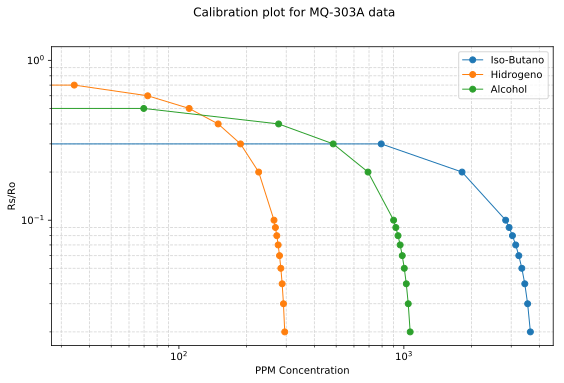

In [21]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()

fig.set_size_inches(9, 5.5, forward=True)
fig.set_dpi(200)

# only these two lines are calibration curves
plt.plot(MQ303A_Iso_Butano, x_MQ303A, marker='o', linewidth=1, label='Iso-Butano')
plt.plot(MQ303A_Hidrogeno, x_MQ303A, marker='o', linewidth=1, label='Hidrogeno')
plt.plot(MQ303A_Alchol, x_MQ303A, marker='o', linewidth=1, label='Alcohol')



# reference line, legends, and axis labels
#line = mlines.Line2D([0, 1], [0, 1], color='black')
#transform = ax.transAxes
#line.set_transform(transform)
#ax.add_line(line)
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

fig.suptitle('Calibration plot for MQ-303A data')
ax.set_xlabel('PPM Concentration')
ax.set_ylabel('Rs/Ro')


#Save image
plt.savefig('MQ303A.svg', format = 'svg', dpi = 1200)
plt.savefig('MQ303A.png')
plt.savefig('MQ303A.eps', format = 'eps', dpi = 1200)